- 로지스틱회귀
    - 범주형 데이터를 통해 회귀

In [4]:
# 타이타닉
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot

In [21]:
titanic_df = pd.read_csv('C:/Users/and_c/Desktop/sparta_python/titanic/train.csv', encoding='utf-8')

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 변수설명
    - ㅇ
    - ㅇ
    - 
    - 

- 가설 :   
    1. 비상상황 특성상 여성을 배려해서 여성이 많이 생존했다.
        - pivot table을 만들어 확인
        - 그래프를 통해 확인

In [23]:
# 대소문자 구분
pd.pivot_table(titanic_df, index = 'Sex', columns= 'Survived', aggfunc='size')

Survived,0,1
Sex,,
female,81,233
male,468,109


- 정확도(Accuracy) 맞춘 개수 / 전체 데이터
- 생존을 맞춤
    - 여성은 다 살았을 것이고 남성은 모두 죽었을 것이다.


In [32]:
titanic_df[['Survived']]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


<AxesSubplot:xlabel='Sex', ylabel='count'>

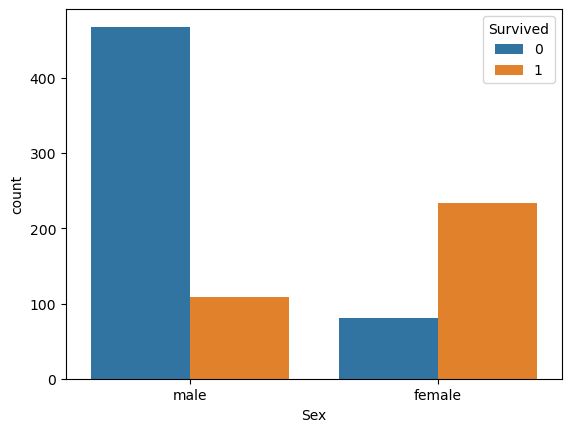

In [33]:
sns.countplot(data = titanic_df, x = 'Sex', hue = 'Survived')

In [ ]:
# 오즈비 (odds ratio): p / 1-p
# but 이 식에는 한계가 존재해서 log함수 활용
# log(p) - log(1-p) = w0 + w1*x
# 로지스틱회귀는 위의 식과 같다


- 암 예측 모델 : 무조건 환자가 음성이라고 판정
    - 100명의 환자 입실 95명은 음성 5명은 양성
    - 위의 따르면 암 예측 모델의 정확도는 95%
    > 정확도는 매우 높아 보이지만 실제로 암 환자를 하나도 못 맞췄기 때문에 이런 것들을 걸러내기 위한 보완 지표 : f1_score

In [34]:
# 실제와 에측표 혼동 행렬
#          실재
#         Y   N
# 예측  Y TP FP 
#       N FN TN
#  TP / TP+FP

In [36]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 숫자
    - age, Sibsp, Parch, Fare- 
- 범주형
    - Pclass
    - Sex
    - Cabin
    - Embarked
- x 변수 1개 y변수 : Survived


In [37]:
# 데이터에 대한 결측치, 전체 갯수 등 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# X : fare y : survived
x_1 = titanic_df[['Fare']]
y_true = titanic_df[['Survived']]

<AxesSubplot:xlabel='Fare', ylabel='Count'>

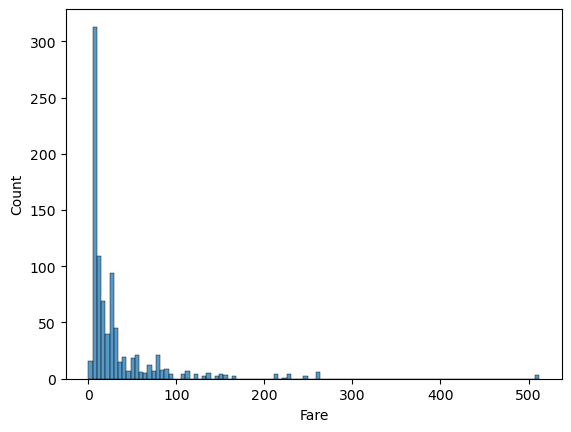

In [41]:
sns.histplot(data = titanic_df, x = 'Fare')

In [ ]:
sns.scatterplot(data = titanic_df, x = x_1, y = y_true)

In [42]:
# 데이터 기술통계를 보는 법 (수치형) 
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
model_lor = LogisticRegression()
model_lor.fit(x_1,y_true)

NameError: name 'LogisticRegression' is not defined

In [ ]:
def get_att(x):
    #x모델을 넣기
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_feature_in_)
    print('들어간 독립변수(x)의 이름', x.feature_names_in_)
    print('가중치', x.coef_)
    print('바이어스', x.intercept_)

In [ ]:
get_att(model_lor)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def get_metrics(true, pred):
    print('정확도', accuracy_score(true, pred))
    print('f1_score', f1_score(true,pred))

In [ ]:
y_pred_1 = model_lor.predict(x_1)
y_pred[:10]
len(y_pred_1)

In [ ]:
get_metrics(y_true, y_pred_1)

- 다중로직회귀

In [44]:
# y : survived
# x : (수치형)Fare, (범주형) Pclass, Sex

In [ ]:
def get_sex(x):
    if x == 'Female':
        return 0
    else :
        return 1
    
titanic_df['sex_en'] = titanic_df['Sex'].apply(get_sex)

In [ ]:
x_2 = titanic_df[['Pclass','Sex_en','Fare']]
y_true = titanic_df[['Survived']]
model_lor2 = LogisticRegression()
model_lor2.fit(x_2,y_true)

In [ ]:
get_att(model_lor2)

In [ ]:
y_pred_2 = model_lor2.predict(x_2)
y_pred_2[:10]

In [ ]:
# x변수 Fare
get_metrics(y_true, y_pred_1)
# x변수 Fare, Sex, Pclass
get_metrics(y_true, y_pred_2)

In [ ]:
# 각 데이터별 y = 1인 확률 뽑아내기 생존할 확률
model_lor2.predict_probe(x_2)